# import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from LinearEquation_EchelonForm import make_matrix_to_reduced_echlon_form

# read data

In [2]:
data = pd.read_csv("data.csv",header=None)

In [3]:
row_number = len(data)

In [4]:
train_num = int(0.95*row_number)
x_train = np.array(data[0][0:train_num])
y_train = np.array(data[1][0:train_num])
x_test = np.array(data[0][train_num:])
y_test = np.array(data[1][train_num:])

In [5]:
X_train = np.array([np.ones(train_num),x_train]).T

In [6]:
X_train_T = X_train.T

In [7]:
y = np.asmatrix(y_train).T

# Computing the least-squares

## Train 

In [8]:
A= np.matmul(X_train_T,X_train)
A.shape

(2, 2)

In [10]:
B = np.matmul(X_train_T, y)
B.shape

(2, 1)

In [11]:
M = np.append(A,B,axis=1)
M

matrix([[9.50000000e+01, 4.67324629e+03, 6.91494487e+03],
        [4.67324629e+03, 2.38714737e+05, 3.52108145e+05]])

In [12]:
make_matrix_to_reduced_echlon_form(M)

In [13]:
M

matrix([[1.        , 0.        , 6.21361309],
        [0.        , 1.        , 1.35337434]])

In [19]:
best_weights = M[:,-1]
best_weights

matrix([[6.21361309]])

In [44]:
least_square = lambda x1 : best_weights[0]+best_weights[1]*x1
least_square_model = lambda x1 : least_square(x1).item((0,0))

## Test

In [45]:
def print_test_result(x0,y0):
    predict= least_square_model(x0)
    print("Blood cell concentration = ",x0)
    print("    real value = ",y0)
    print("    estimated value = ",predict)
    print("    error = ",abs(y0-predict))
    print("-------------------------------------------------------")
    

In [50]:
total_error =0
for i in range(len(x_test)):
    print_test_result(x_test[i],y_test[i])
    total_error += pow((y_test[i]-least_square_model(x_test[i])),2)

print ("mean square error = ", total_error/len(x_test))

Blood cell concentration =  50.03017434031214
    real value =  81.53699078301504
    estimated value =  73.92316747985068
    error =  7.6138233031643665
-------------------------------------------------------
Blood cell concentration =  49.23976534275376
    real value =  72.11183246961566
    estimated value =  72.85344822115135
    error =  0.74161575153569
-------------------------------------------------------
Blood cell concentration =  50.039575939875995
    real value =  85.23200734232566
    estimated value =  73.93589136349459
    error =  11.296115978831068
-------------------------------------------------------
Blood cell concentration =  48.14985889102886
    real value =  66.22495788805463
    estimated value =  71.37839679183783
    error =  5.153438903783197
-------------------------------------------------------
Blood cell concentration =  25.128484647772304
    real value =  53.45439421485053
    estimated value =  40.221859523400354
    error =  13.232534691450176
-

In [41]:
y_hat = least_square_model(x_train)
y_hat

matrix([[ 50.20145331,  78.52007896,  89.48722103,  70.46592575,
          87.16327407,  80.84163617,  76.8757192 ,  59.40063839,
          71.31774234,  77.33345443,  67.68351059,  79.77172131,
          65.98410462,  84.937329  ,  82.98676109,  72.46925667,
          66.69211799,  87.81846828,  67.95271519,  58.74729807,
          95.79321273,  94.74601922,  70.47346265,  62.48102115,
          76.37955892,  86.5645604 ,  83.77550141,  92.30928158,
          69.46710811,  74.6358352 ,  76.89222955,  54.35020176,
          63.64605225,  84.93200942,  84.03865717,  67.71166156,
          89.98237287,  51.00195592,  55.52517357,  57.20287778,
          66.51403037,  64.83946544,  73.98132372,  65.58697471,
          91.47278728,  50.42705877,  60.5744637 ,  78.72074851,
          52.04457282,  93.78659445,  57.80400494,  66.44220636,
          61.15998673,  62.6773061 ,  75.35566055,  80.75489502,
          62.21316661,  90.79233324,  72.80489212,  61.8409327 ,
          61.94829713,  7

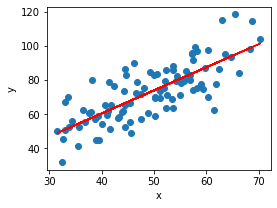

In [42]:
plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.scatter(x_train, y_train)
ax.plot(x_train, y_hat.T,'r')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.axis('tight')

plt.show()

In [52]:
from sklearn.linear_model import LinearRegression
    

In [58]:
reg = LinearRegression().fit(np.array([data[0][0:train_num]]), np.array(data[1][0:train_num]))
eg.coef_

ValueError: Found input variables with inconsistent numbers of samples: [1, 95]